In [ ]:
!pip install luwiji
!pip install jcopml
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

# Basic Text Preprocessing

In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [40]:
text = "Halo, nama saya Deyvan. Saya makan bakso harga Rp 15.000 hari ini. Kamu mau?"

## Normalization

In [41]:
text = text.lower()
text

'halo, nama saya deyvan. saya makan bakso harga rp 15.000 hari ini. kamu mau?'

## Tokenization

In [42]:
text.split(".")

['halo, nama saya deyvan',
 ' saya makan bakso harga rp 15',
 '000 hari ini',
 ' kamu mau?']

In [43]:
sent_tokenize(text)

['halo, nama saya deyvan.',
 'saya makan bakso harga rp 15.000 hari ini.',
 'kamu mau?']

In [44]:
tokens = word_tokenize(text)
tokens

['halo',
 ',',
 'nama',
 'saya',
 'deyvan',
 '.',
 'saya',
 'makan',
 'bakso',
 'harga',
 'rp',
 '15.000',
 'hari',
 'ini',
 '.',
 'kamu',
 'mau',
 '?']

## Punctuation Removal / Alphanumeric Cleansing

In [45]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
for char in "depan":
  print(char)

d
e
p
a
n


In [47]:
tokens= [token for token in tokens if token not in punctuation]
tokens

['halo',
 'nama',
 'saya',
 'deyvan',
 'saya',
 'makan',
 'bakso',
 'harga',
 'rp',
 '15.000',
 'hari',
 'ini',
 'kamu',
 'mau']

In [48]:
"." in punctuation

True

In [49]:
# Alphanumeric cleanisng
tokens= [token for token in tokens if token.isalnum()]
tokens

['halo',
 'nama',
 'saya',
 'deyvan',
 'saya',
 'makan',
 'bakso',
 'harga',
 'rp',
 'hari',
 'ini',
 'kamu',
 'mau']

## Stop words removal
kata kata yang sering muncul

In [50]:
stopwords.words("indonesian")

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [51]:
tokens = [token for token in tokens if token not in stopwords.words("indonesian")]
tokens

['halo', 'nama', 'deyvan', 'makan', 'bakso', 'harga', 'rp']

## Why preprocessing

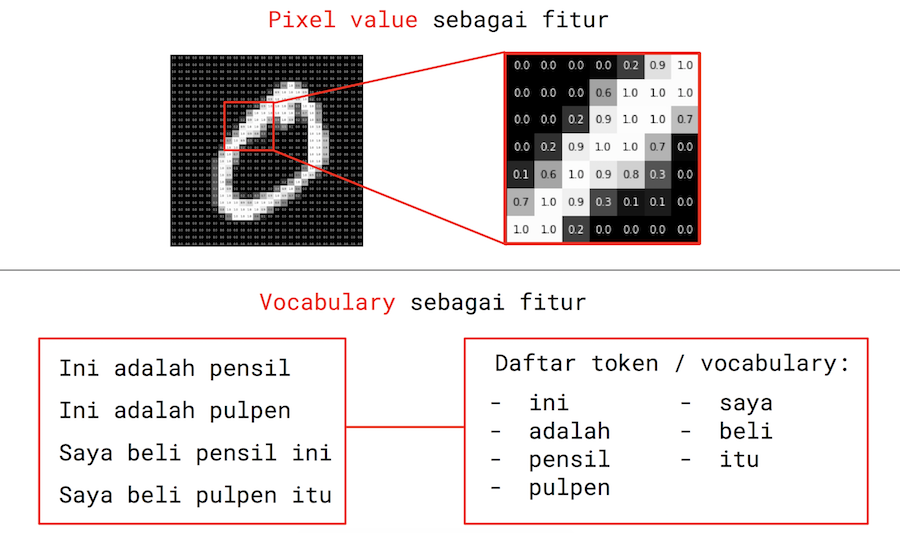

In [52]:
from luwiji.text_proc import illustration
illustration.vocabulary

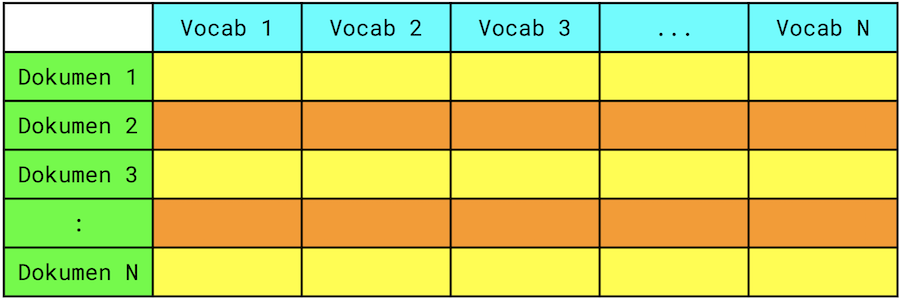

In [53]:
illustration.structured

## More advance preprocessing

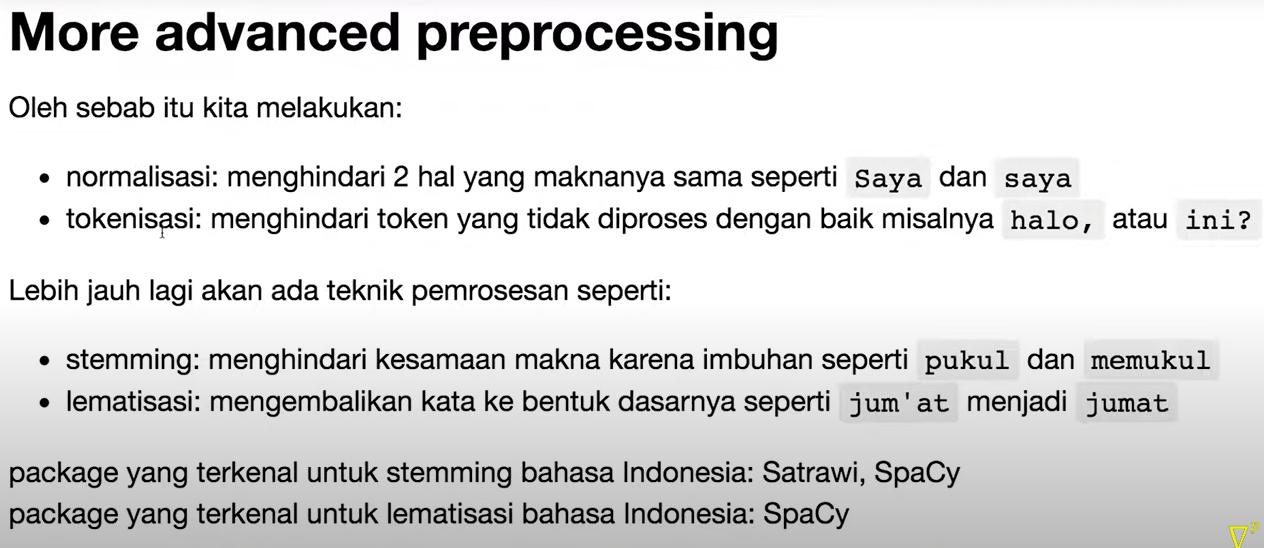

# BoW and TF-IDF

In [54]:
import numpy as np
import pandas as pd

from luwiji.text_proc import illustration, demo

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [56]:
text = demo.text
text

['Ini adalah pensil, tapi itu adalah pulpen',
 'Itu adalah pensil.',
 'Saya mau beli pulpen.',
 'Saya ada pulpen itu, tapi tidak ada pensil itu.',
 'Saya tidak ada pensil ini',
 'Saya mau beli pulpen dan pensil',
 'Ini adalah pulpen']

## Bag of Words (BoW) / Term Frequency (TF)

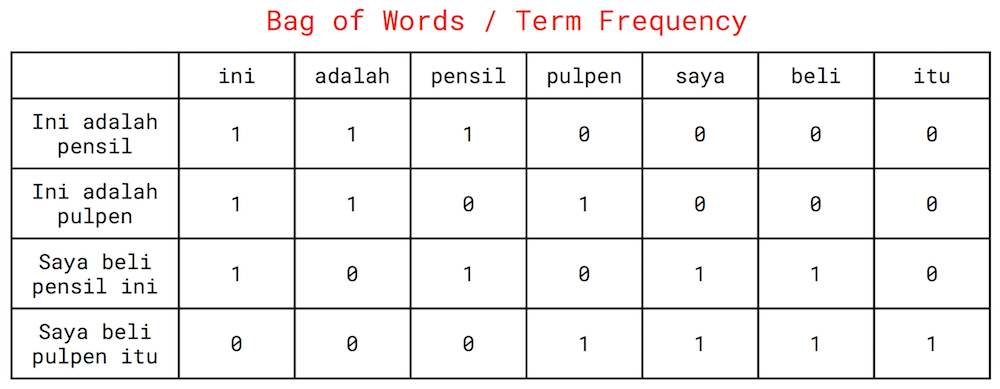

In [57]:
illustration.bag_of_words

In [58]:
bow = CountVectorizer()
bow_matrix = bow.fit_transform(text)

In [61]:
pd.DataFrame(bow_matrix.toarray(), columns=bow.get_feature_names_out(), index=text)

,ada,adalah,beli,dan,ini,itu,mau,pensil,pulpen,saya,tapi,tidak
"Ini adalah pensil, tapi itu adalah pulpen",0,2,0,0,1,1,0,1,1,0,1,0
Itu adalah pensil.,0,1,0,0,0,1,0,1,0,0,0,0
Saya mau beli pulpen.,0,0,1,0,0,0,1,0,1,1,0,0
"Saya ada pulpen itu, tapi tidak ada pensil itu.",2,0,0,0,0,2,0,1,1,1,1,1
Saya tidak ada pensil ini,1,0,0,0,1,0,0,1,0,1,0,1
Saya mau beli pulpen dan pensil,0,0,1,1,0,0,1,1,1,1,0,0
Ini adalah pulpen,0,1,0,0,1,0,0,0,1,0,0,0


## Inverse Document Frequency (IDF)

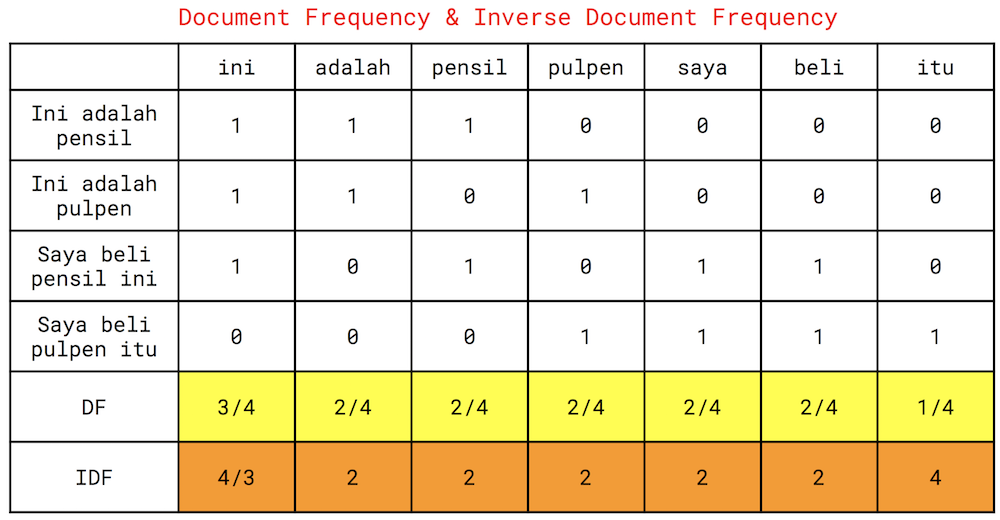

In [62]:
illustration.inverse_df

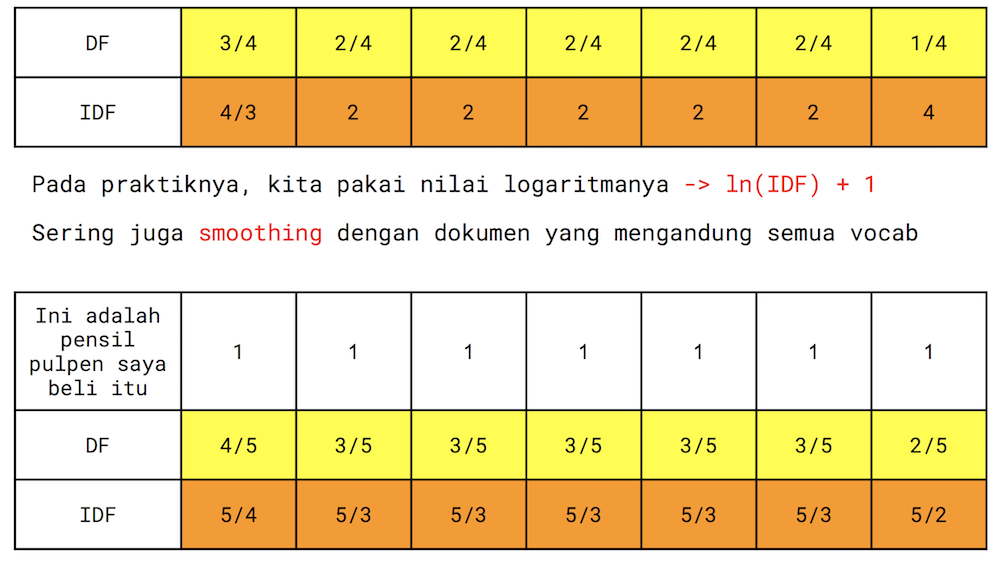

In [63]:
illustration.practical_idf

## Term Frequency -Inverse Document Frequency (TF-IDF)
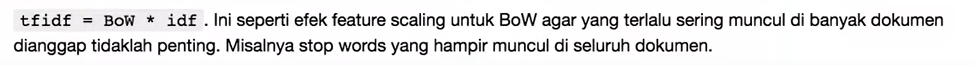

In [64]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text)

In [65]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=text)

,ada,adalah,beli,dan,ini,itu,mau,pensil,pulpen,saya,tapi,tidak
"Ini adalah pensil, tapi itu adalah pulpen",0.000000,0.684968,0.000000,0.000000,0.342484,0.342484,0.000000,0.260468,0.260468,0.000000,0.400675,0.000000
Itu adalah pensil.,0.000000,0.622766,0.000000,0.000000,0.000000,0.622766,0.000000,0.473630,0.000000,0.000000,0.000000,0.000000
Saya mau beli pulpen.,0.000000,0.000000,0.579934,0.000000,0.000000,0.000000,0.579934,0.000000,0.376999,0.430378,0.000000,0.000000
"Saya ada pulpen itu, tapi tidak ada pensil itu.",0.622620,0.000000,0.000000,0.000000,0.000000,0.532195,0.000000,0.202374,0.202374,0.231028,0.311310,0.311310
Saya tidak ada pensil ini,0.519598,0.000000,0.000000,0.000000,0.444135,0.000000,0.000000,0.337776,0.000000,0.385601,0.000000,0.519598
Saya mau beli pulpen dan pensil,0.000000,0.000000,0.454207,0.547181,0.000000,0.000000,0.454207,0.295267,0.295267,0.337074,0.000000,0.000000
Ini adalah pulpen,0.000000,0.622766,0.000000,0.000000,0.622766,0.000000,0.000000,0.000000,0.473630,0.000000,0.000000,0.000000


## N-Gram
untuk mencakup informasi urutan kata

In [67]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(text)

In [70]:
tfidf.get_feature_names_out()

array(['ada', 'ada pensil', 'ada pulpen', 'adalah', 'adalah pensil',
       'adalah pulpen', 'beli', 'beli pulpen', 'dan', 'dan pensil', 'ini',
       'ini adalah', 'itu', 'itu adalah', 'itu tapi', 'mau', 'mau beli',
       'pensil', 'pensil ini', 'pensil itu', 'pensil tapi', 'pulpen',
       'pulpen dan', 'pulpen itu', 'saya', 'saya ada', 'saya mau',
       'saya tidak', 'tapi', 'tapi itu', 'tapi tidak', 'tidak',
       'tidak ada'], dtype=object)

# SMS Spam Classifier

In [75]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.text_proc import illustration

In [76]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

## Import Data

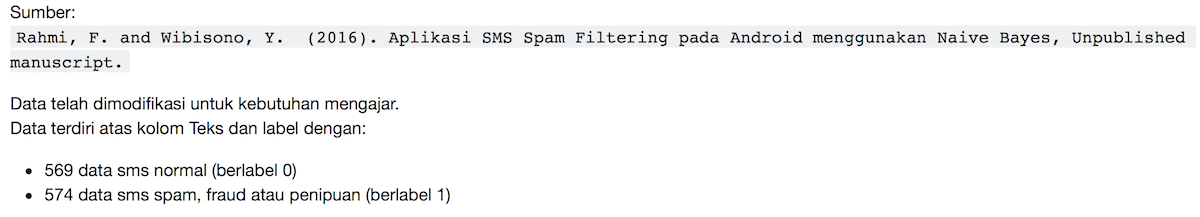

In [77]:
illustration.nomenklatur

In [78]:
df = pd.read_csv("/content/spam.csv")
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,1
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",1
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,1


## Dataset splitting


In [80]:
X = df.Teks
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914,), (229,), (914,), (229,))

## Training

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import CountVectorizer #BoW
from sklearn.feature_extraction.text import TfidfVectorizer #tfidf

In [83]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


{'algo__C': 4.676478725076048, 'algo__fit_intercept': True}
0.9989059080962801 0.9638912855910267 0.982532751091703


## Sanity Check

In [86]:
text = ["Sayng belikn aq pulsa di nmr ini,0895616236797,nanti aq yg tlpn km,ini aq pke hp tmn,skrg yacc"]
model.predict(text), model.predict_proba(text)

(array([1]), array([[0.22969037, 0.77030963]]))

In [88]:
textis = ["Halo bro, apa kabar? udah lama ga ketemu ini hehe. Ayola besok nongski der"]
model.predict(textis), model.predict_proba(textis)

(array([0]), array([[0.95264178, 0.04735822]]))

# Document Similarity & Keyword Extraction

In [90]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

## Import Data

In [92]:
df = pd.read_csv("/kompas.csv")
df.head()

,teks
0,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...
1,Jakarta Dikangkangi Para Preman\nKALAU tak pun...
2,Penyimpangan di Setpres Seolah Terjadi Sekaran...
3,"Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\nK..."
4,"Stop Kekerasan, Elite agar Duduk Bersama\nSeju..."


## Extract TF-IDF

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tfidf = TfidfVectorizer(ngram_range=(1,2), tokenizer=word_tokenize, stop_words=sw_indo)
tfidf_matrix = tfidf.fit_transform(df.teks)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


## TF-IDF Similarity -> Document Similarity

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix)
sim

array([[1.        , 0.00858328, 0.01060043, ..., 0.00856287, 0.00677808,
        0.01513341]])

In [98]:
sim.argsort()

array([[ 932, 1131, 1593, ...,  215,  144,    0]])

In [100]:
a = np.array([1, 5, 4, 3, 6, 2, 3])

In [102]:
a.argmax()

4

In [105]:
df.teks[0][:200]

'Ginandjar Tetap Ditahan. Jaksa Agung Dilaporkan ke Polri\nKejaksaan Agung memutuskan untuk tetap menahan tersangka kasus korupsi, Ginandjar Kartasasmita, sampai batas waktu yang ditentukan KUHAP. Sedan'

In [106]:
df.teks[144][:200]

'Kejaksaan Agung Terbitkan Surat Penahanan Baru\nKejaksaan Agung (Kejagung) akhirnya menerbitkan surat perintah penahanan yang baru terhadap mantan Menteri Pertambangan dan Energi Ginandjar Kartasasmita'

In [107]:
df.teks[215][:200]

'Kuasa Hukum Ginandjar Bertahan di Rutan\nSejumlah kuasa hukum Ginandjar Kartasasmita hingga hari Selasa (17/4) pukul 22.00 masih bertahan di ruang tahanan (rutan) Kejaksaan Agung (Kejagung). Selasa pag'

In [109]:
df.teks[33][:200]

'Amien Rais Bersedia Dialog\nKetua Majelis Permusyawaratan Rakyat (MPR) Amien Rais hari Minggu (8/4) di Yogyakarta menegaskan, pada prinsipnya dirinya lebih dari bersedia untuk bertemu dengan tokoh-toko'

In [110]:
df.teks[33][:]

'Amien Rais Bersedia Dialog\nKetua Majelis Permusyawaratan Rakyat (MPR) Amien Rais hari Minggu (8/4) di Yogyakarta menegaskan, pada prinsipnya dirinya lebih dari bersedia untuk bertemu dengan tokoh-tokoh nasional. Bukan hanya dengan Presiden Abdurrahman Wahid, Wakil Presiden Megawati Soekarnoputri, dan Ketua DPR Akbar Tandjung, pertemuan dengan tokoh lain pun Amien sangat setuju.\n\nPernyataan Ketua Umum Partai Amanat Nasional (PAN) itu disampaikan kepada pers di kediamannya di Yogyakarta. Perkara bertemu itu, kata Amien, kapan saja bisa bertemu asalkan agendanya jelas. Apalagi, waktunya sudah sangat mepet dan hanya sampai akhir April ini.\n\nAjakan berdialog untuk membicarakan masalah bangsa datang dari Presiden Abdurrahman Wahid saat bertemu Forum Rektor Indonesia (FRI). Ketua DPR Akbar Tandjung sudah menyatakan kesediaannya. Amien Rais, yang pada awalnya menolak, kemudian menyatakan kesiapannya berdialog, dengan syarat agendanya jelas.\n\nSisi positif\n\nPengamat politik Deliar Noer

## Keyword Extraction

In [111]:
vocab = tfidf.get_feature_names_out()
vocab[-10:]

array(['zuniga memilih', 'zunnatul', 'zunnatul mafruhah', 'zurich',
       'zurich northholt', 'zw', 'zw suparman', 'zw tim', 'zx',
       'zx diserbu'], dtype=object)

In [112]:
tfidf_matrix[0].toarray()

array([[0.02115058, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [113]:
sorted_tfidf = tfidf_matrix[0].toarray()[0].argsort()
sorted_tfidf

array([274212, 365469, 365468, ..., 386379, 436652, 169219])

In [115]:
vocab[169219]

'ginandjar'

In [116]:
vocab[33]

"'' 15"

In [118]:
[vocab[idx] for idx in reversed(sorted_tfidf[-10:])]

['ginandjar',
 'putusan',
 'penahanan',
 'hukum ginandjar',
 'kuasa hukum',
 'rusman',
 'kejaksaan',
 'hakim rusman',
 'kuasa',
 '9 april']

In [119]:
def extract_keywords_tfidf(doc, tfidf, topk=10):
  matrix = tfidf.transform([doc])
  vocab = tfidf.get_feature_names_out()

  sorted_tfidf = matrix[0].toarray()[0].argsort()
  return [vocab[idx] for idx in reversed(sorted_tfidf[-topk:])]

In [120]:
text = '''Analisis sentimen telah menjadi salah satu bidang yang berkembang pesat dalam pemrosesan bahasa alami (NLP), dengan aplikasi yang luas dalam memahami opini publik, perilaku konsumen, dan umpan balik pengguna. Penelitian ini bertujuan untuk mengeksplorasi dan membandingkan efektivitas dua metode populer dalam analisis sentimen, yaitu TF-IDF (Term Frequency-Inverse Document Frequency) dan FastText, dalam konteks ulasan aplikasi mobile yang diambil dari Google Play Store. Dataset yang digunakan terdiri dari lebih dari 10.000 ulasan yang mencakup berbagai kategori aplikasi, termasuk permainan, produktivitas, dan media sosial.

Metode TF-IDF digunakan untuk mengubah teks ulasan menjadi representasi numerik yang dapat digunakan oleh model pembelajaran mesin, sementara FastText, yang merupakan model pembelajaran mendalam, digunakan untuk menghasilkan representasi kata yang lebih kaya dengan mempertimbangkan konteks dan sub-kata. Kami menerapkan beberapa algoritma klasifikasi, termasuk Logistic Regression, Naive Bayes, dan Support Vector Machine (SVM), untuk mengevaluasi kinerja kedua pendekatan dalam mengklasifikasikan sentimen sebagai positif, negatif, atau netral.

Hasil analisis menunjukkan bahwa FastText secara signifikan mengungguli TF-IDF dalam hal akurasi dan kemampuan untuk menangkap nuansa bahasa yang kompleks. Model FastText berhasil mencapai akurasi sebesar 87%, sementara model berbasis TF-IDF hanya mencapai 75%. Temuan ini menyoroti pentingnya pemilihan metode yang tepat dalam analisis sentimen, terutama dalam konteks data yang tidak terstruktur dan beragam seperti ulasan aplikasi. Penelitian ini memberikan wawasan berharga bagi pengembang aplikasi dan pemasar dalam memahami persepsi pengguna, serta membuka jalan untuk penelitian lebih lanjut dalam penerapan teknik pembelajaran mendalam dalam analisis sentimen.
'''

In [121]:
extract_keywords_tfidf(text, tfidf)

['aplikasi',
 'ulasan',
 'sentimen',
 'analisis',
 'pembelajaran',
 'model',
 'metode',
 'akurasi',
 'konteks',
 'penelitian']

In [122]:
tfidf.idf_.argsort()

array([ 28068,      0, 200992, ..., 199885, 199916, 548425])

In [123]:
vocab[548425]

'zx diserbu'

In [124]:
vocab[28068]

'``'

In [125]:
vocab[200992]

'jakarta'